<h1>Python Project</h1>

<h2>Table of Contents</h2>
<a id="top"></a>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li><a href="#introduction">Introduction to Machine Learning</a></li>
        <li><a href="#load_libraries">Load libraries</a></li>
        <li><a href="#data_exploration">Data exploration</a></li>
        <li><a href="#data_preprocessing">Data preprocessing</a></li>
        <li><a href="#splitting_data">Splitting data for training and testing</a></li>
        <li><a href="#classification_model">Preparing a classification model</a></li>
        <li><a href="#assembling">Assembling all of these steps using pipelines</a></li>
        <li><a href="#training_model">Training the model</a></li>
        <li><a href="#predictions">Running predictions on the model</a></li>
        <li><a href="#evaluating">Evaluating and visualizing model performance</a></li>
        <li><a href="#references">References</a></li>
    </ul>
    <!--<p>Estimated time needed: <strong>20 min</strong></p>-->
</div>

<hr>

<h2 id="introduction">Introduction to Machine Learning</h2>

<h3>Supervised machine learning</h3>
<p>Supervised machine learning refers to the type of problems in which each record in the the data set contains a label or a flag.</p>
<p>Using this data set that includes the label, we can train an algorithm to predict the future for unlabeled data. You fit that into your algorithm, and the algorithm now predicts a label for this data. This is referred to as supervised learning. <code>Regression</code> and <code>classification</code> are the two types of supervised learning.</p>

<ul>
    <li>
        <h4>Regression</h4>
        <p>The type of use cases where a continuous value must be predicted is referred to as regression.</p>
    </li>
    <li>
        <h4>Classification</h4>
        <p>The type of use cases where the output is a binary value or at least a discrete value instead of a continuous value is referred to as classification. In other words, the algorithm does not predict a number, but instead predicts a class variable.</p>
    </li>
</ul>

<h3>Unsupervised learning</h3>
<p>Unsupervised machine learning refers to the type of problems in which no record in the the data set contains any label or a flag. <code>Clustering</code> is a type of unsupervised machine learning.</p>
<ul>
    <li>
        <h4>Clustering</h4>
        <p>In the 3-dimensional plot shown previously, notice the 3 clusters or clouds of data. Just by plotting the table, we see that data is centered around three clusters. This process is called clustering.</p>
    </li>
</ul>

<h3>Building a model</h3>
<p>A machine learning model refers to a mathematical configuration that is built using previously seen data and is set up to predict new data to a certain degree of accuracy that is previously calculated.</p>
<p>Following is the sequence of steps that are performed iteratively to build a model from scratch.</p>
<ul>
    <li>Data exploration</li>
    <li>Data preprocessing</li>
    <li>Splitting data for training and testing</li>
    <li>Preparing a classification model</li>
    <li>Assembling all of these steps using pipelines</li>
    <li>Training the model</li>
    <li>Running predictions on the model</li>
    <li>Evaluating and visualizing model performance</li>
</ul>

<h3>Pipelines</h3>
<p>Pipelines is a very convenient process of designing your data processing in a machine learning flow. Data preprocessing is a tedious step that must be applied on data every time before training begins, irrespective of the algorithm that will be applied. The following image shows a typical sequence of preprocessing steps that is applied every time before the data modeling begins.</p>
<img src="https://developer.ibm.com/developer/articles/introduction-to-machine-learning/images/pipelines-1.png" alt="pipeline_image01" style="width:600px;padding:0;margin:0 auto;">

<p>The idea is that when using pipelines, you can keep the preprocessing and just switch the different modeling algorithms or different parameter sets of your modeling algorithm. The overall idea is that you can fuse your complete data processing flow into one single pipeline, and that single pipeline can be used downstream.</p>
<img src="https://developer.ibm.com/developer/articles/introduction-to-machine-learning/images/pipelines-2.png" alt="pipeline_image02" style="width:600px;padding:0;margin:0 auto;">

<p>Similar to a machine learning algorithm, pipelines have methods called fit, evaluate, and score. Basically, fit starts the training and score returns the predicted value.</p>
<img src="https://developer.ibm.com/developer/articles/introduction-to-machine-learning/images/pipelines-3.png" alt="pipeline_image02" style="width:600px;padding:0;margin:0 auto;">

<p><code>Cross-validation</code> is one of the biggest advantages of using pipelines. It refers to the process of changing or tuning several hyperparameters using the same pipeline, which accelerates the optimization of your algorithm. There are several hyperparameters that can be tuned to better performing models.</p>

<h2 id="load_libraries">Load libraries</h2>

In [115]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import export_graphviz

import io
import numpy as np
import pandas as pd
import pydot
import seaborn as sns
import sys

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import scikitplot as skplt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

<h2 href="#data_exploration">Data exploration</h2>

<h3>Import data</h3>
<p>The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. You can find the "Ames Housing dataset" from the following link: <a href="https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data">https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data</a>. We will be using this data set throughout this notebook.</p>

In [116]:
df_housing = pd.read_csv("../files/house-prices-advanced-regression-techniques/train.csv")
df_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [117]:
print("Columns (variables):\n\n{}".format(list(df_housing.columns)))

Columns (variables):

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch'

In [118]:
print("The dataset contains columns of the following data types:\n\n{0}"
      .format(str(df_housing.dtypes)))

The dataset contains columns of the following data types:

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object


In [119]:
print("The dataset contains following number of records for each of the columns:\n\n{0}"
      .format(str(df_housing.count())))

The dataset contains following number of records for each of the columns:

Id               1460
MSSubClass       1460
MSZoning         1460
LotFrontage      1201
LotArea          1460
                 ... 
MoSold           1460
YrSold           1460
SaleType         1460
SaleCondition    1460
SalePrice        1460
Length: 81, dtype: int64


<p>The dataset contains different number of records for each of the columns. The following histogram includes the frequency about <code>missing observations</code>.</p>

Text(0,0.5,'Frequency')

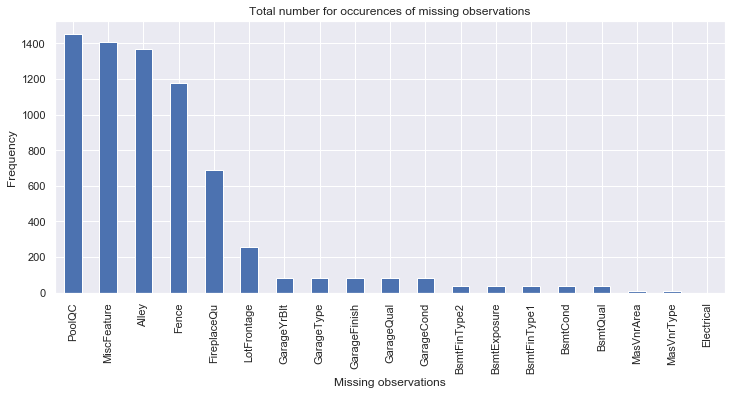

In [120]:
missing_data = df_housing.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
missing_data = missing_data.plot(
    kind='bar', 
    figsize=(12, 5), 
    title="Total number for occurences of missing observations")
missing_data.grid(True, axis='y')
missing_data.set_xlabel("Missing observations")
missing_data.set_ylabel("Frequency")

In [121]:
df_housing.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [122]:
# Show the calculated statistics
print("Statistics for housing dataset:\n")
print("Minimum price: ${}".format(np.amin(df_housing['SalePrice']))) 
print("Maximum price: ${}".format(np.amax(df_housing['SalePrice'])))
print("Mean price: ${}".format(np.mean(df_housing['SalePrice'])))
print("Median price ${}".format(np.median(df_housing['SalePrice'])))
print("Standard deviation of prices: ${}".format(np.std(df_housing['SalePrice'])))

Statistics for housing dataset:

Minimum price: $34900
Maximum price: $755000
Mean price: $180921.19589041095
Median price $163000.0
Standard deviation of prices: $79415.29188606751


<h2 id="data_visualization">Data visualization</h2>

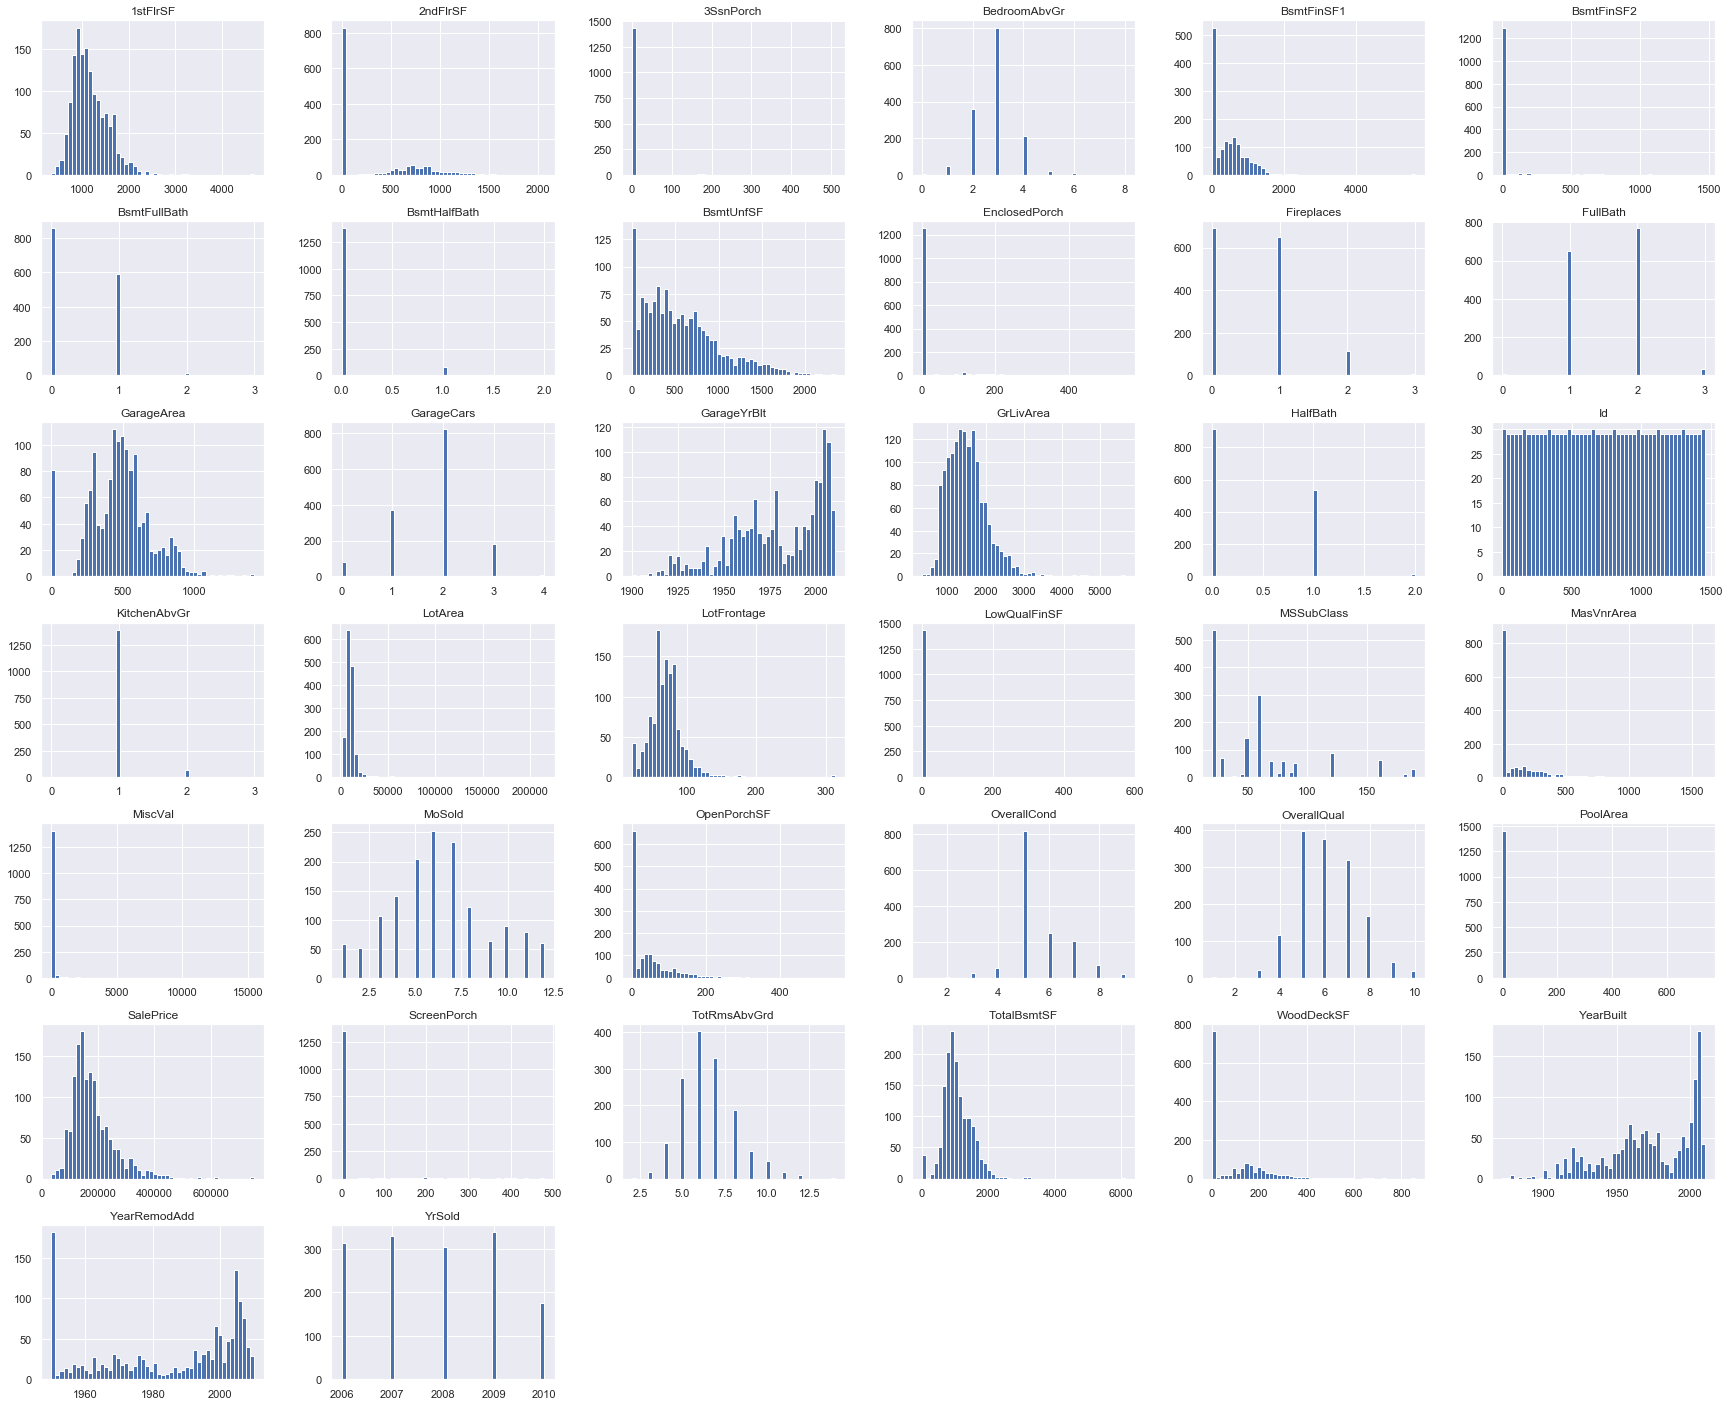

In [123]:
df_housing.hist(bins=50, figsize=(30,25))
plt.show()

<h4>How to choose the right visualization method?</h4>
<p>When visualizing individual variables, it is important to first understand what type of variable you are dealing with. This will help us find the right visualization method for that variable.</p>

In [124]:
qualitative = [f for f in df_housing.columns if df_housing.dtypes[f] == 'object']
quantitative = [f for f in df_housing.columns if df_housing.dtypes[f] != 'object']

print("Qualitative attributes:\n\n{}\n".format(qualitative))
print("Quantitative attributes:\n\n{}\n".format(quantitative))

Qualitative attributes:

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Quantitative attributes:

['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'Garag

<h3>Continuous numerical variables:</h3> 
<p>Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.</p>
<p>In order to start understanding the (linear) relationship between an individual variable and the price. We can do this by using "regplot", which plots the scatterplot plus the fitted regression line for the data.</p>

<h4>Linear relationship</h4>
<p>Let's find the scatterplot of "SalePrice" and others variables. We can calculate the correlation between variables of type "int64" or "float64" using the method <code>corr</code>.</p>

In [125]:
sale_price_serie = df_housing.corr().loc['SalePrice',:].sort_values(ascending=False)
sale_price_serie.drop(labels=['SalePrice'], inplace=True)
print(sale_price_serie)

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


<p>The <code>SalePrice</code> seems to be increasing when the <code>OverallQual</code> and the <code>GrLivArea</code> increase as well as <code>GarageCars</code>. We can also see a negative correlation between <code>SalePrice</code> and <code>BsmtFinSF2</code>, <code>BsmtHalfBath</code> and a couple others. And finally, coefficients close to zero indicate that there is no linear correlation. However, we barely see any cofficients close to zeros, this tells us that all the attributes are important to <code>SalePrice</code>, which is the attribute we are predicting.</p>

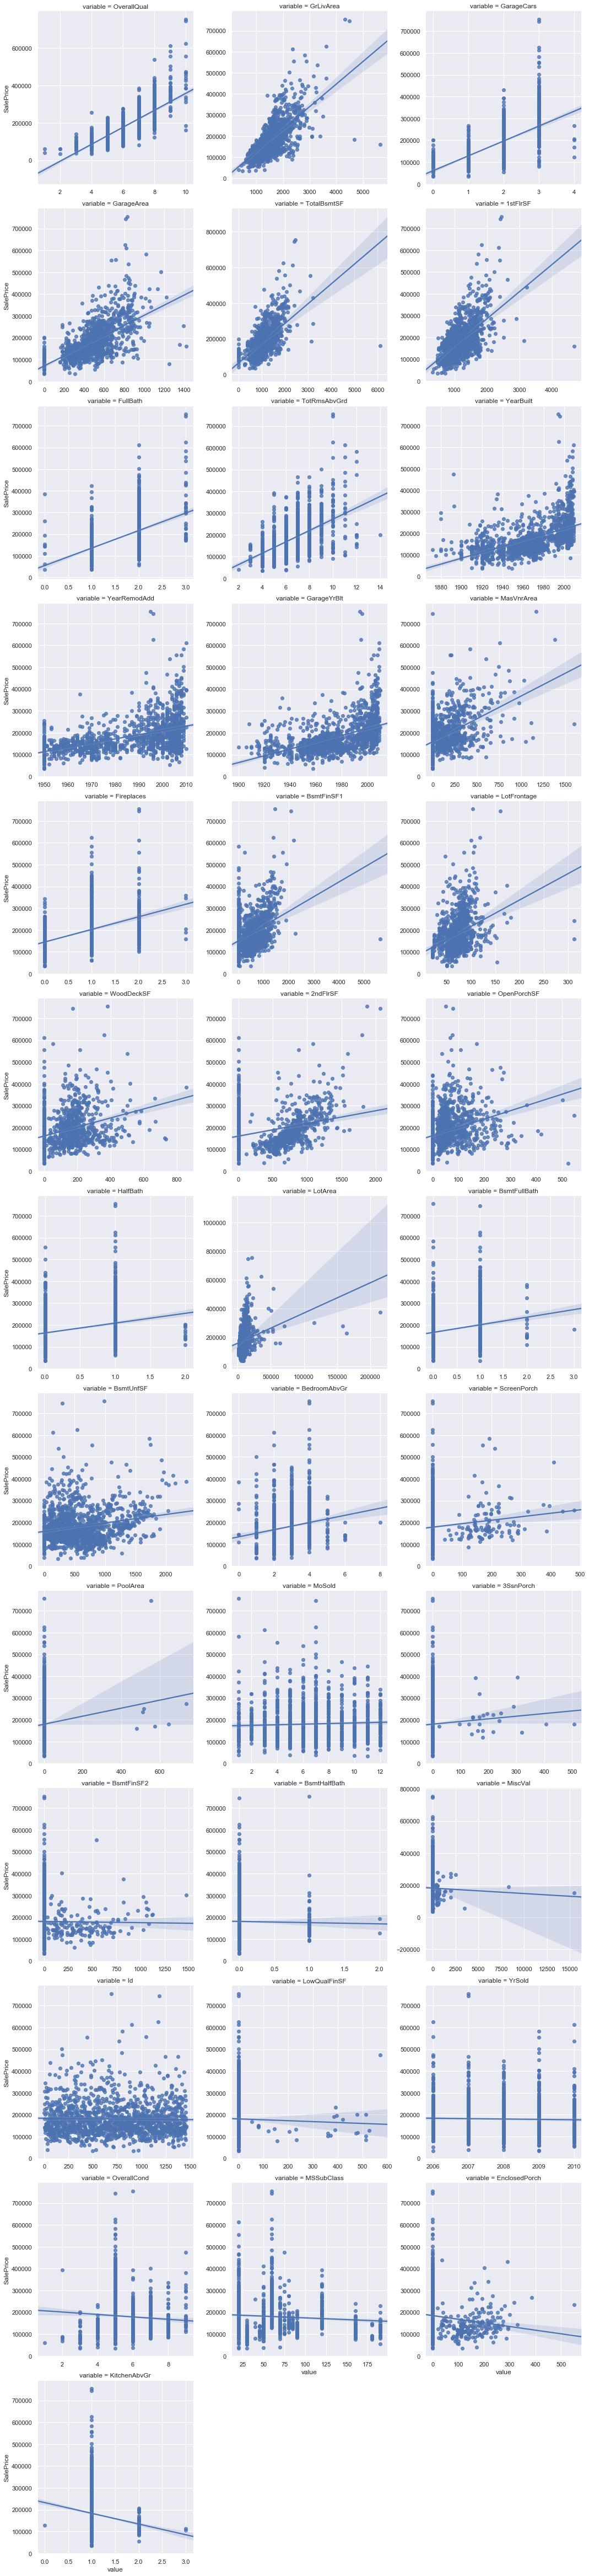

In [126]:
f = pd.melt(df_housing, id_vars=['SalePrice'], value_vars=list(sale_price_serie.keys()))
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False, size=5)
g = g.map(sns.regplot, "value", "SalePrice")

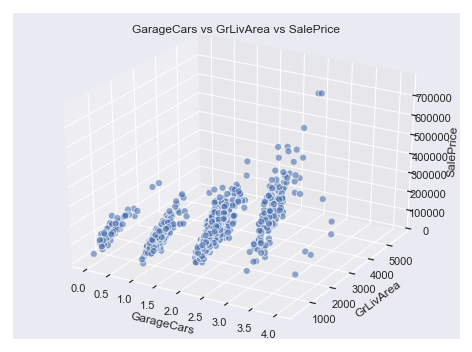

In [127]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x = df_housing['GarageCars']
y = df_housing['GrLivArea']
z = df_housing['SalePrice']
ax.scatter(x, y, z, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('GarageCars')
ax.set_ylabel('GrLivArea')
ax.set_zlabel('SalePrice')

plt.title('GarageCars vs GrLivArea vs SalePrice')
plt.show()

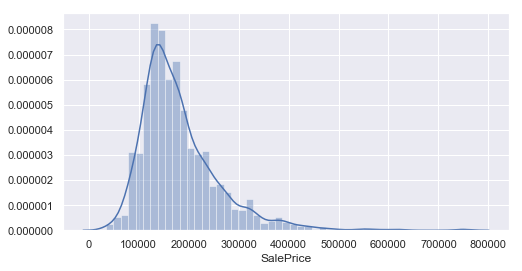

In [128]:
np.random.seed(0)

sns.set(rc={"figure.figsize": (8, 4)}); 
ax = sns.distplot(df_housing['SalePrice'])
plt.show()

<h3>Categorical variables</h3>
<p>These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.</p>

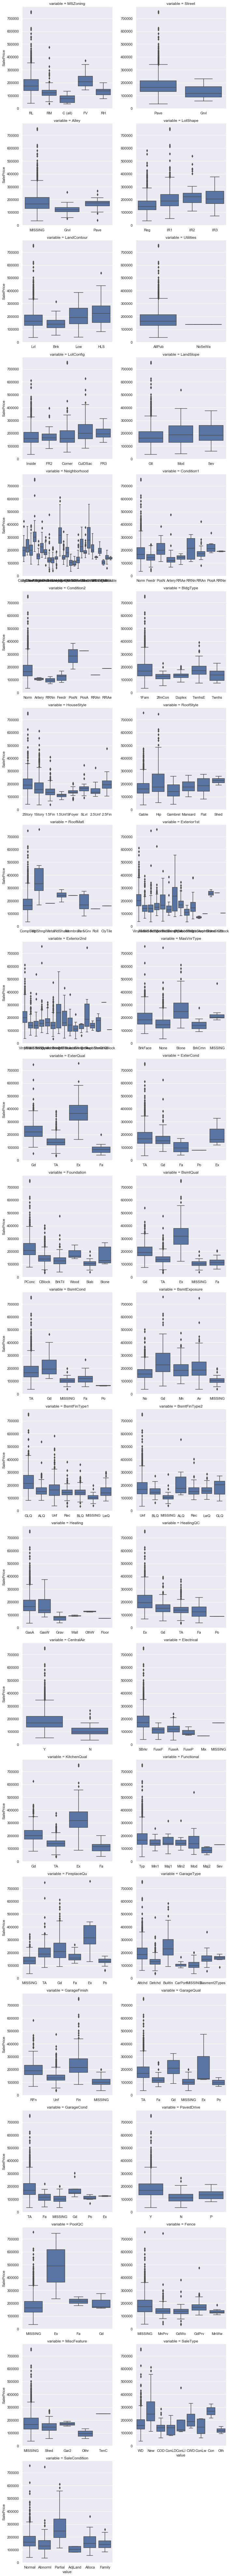

In [129]:
for c in qualitative:
    df_housing[c] = df_housing[c].astype('category')
    if df_housing[c].isnull().any():
        df_housing[c] = df_housing[c].cat.add_categories(['MISSING'])
        df_housing[c] = df_housing[c].fillna('MISSING')
    
f = pd.melt(df_housing, id_vars=['SalePrice'], value_vars=qualitative)
g = sns.FacetGrid(f, col="variable",  col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(sns.boxplot, "value", "SalePrice")

<h2 id="data_preprocessing">Data preprocessing</h2>
<p>Data preprocessing is an important step in the machine learning model building process because the model can perform well only when the data it is trained on is good and well prepared. Therefore, when building models this step consumes a large amount of time. identifying columns that will not add any value toward predicting the outputs. While some of these columns are easily identified, a subject matter expert is usually engaged to identify most of them. Removing such columns helps in reducing dimensionality of the model.</p>

In [130]:
#remove columns that are not required
df_housing = df_housing.drop(['Id'], axis=1)
df_housing.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,MISSING,Reg,Lvl,AllPub,Inside,...,0,MISSING,MISSING,MISSING,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,MISSING,Reg,Lvl,AllPub,FR2,...,0,MISSING,MISSING,MISSING,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,MISSING,IR1,Lvl,AllPub,Inside,...,0,MISSING,MISSING,MISSING,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,MISSING,IR1,Lvl,AllPub,Corner,...,0,MISSING,MISSING,MISSING,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,MISSING,IR1,Lvl,AllPub,FR2,...,0,MISSING,MISSING,MISSING,0,12,2008,WD,Normal,250000


<p>The preprocessing techniques that are applied must be customized for each of the columns. Sklearn provides a library called the ColumnTransformer, which allows a sequence of these techniques to be applied to selective columns using a pipeline.</p>
<p>A common problem while dealing with data sets is that values will be missing. scikit-learn provides a method to fill these empty values with something that would be applicable in its context. We used the SimpleImputer class that is provided by Sklearn and filled the missing values with the most frequent value in the column.</p>
<p>Also, because machine learning algorithms perform better with numbers than with strings, we want to identify columns that have categories and convert them into numbers. We use the OneHotEncoder class provided by Sklearn. The idea of one hot encoder is to create binary variables that each represent a category. By doing this, we remove any ordinal relationship that might occur by just assigning numbers to categories. Basically, we go from a single column that contains multiple class numbers to multiple columns that contain only binary class numbers.</p>

In [131]:
# Defining the categorical columns 
impute_categorical = SimpleImputer(strategy="most_frequent")
onehot_categorical =  OneHotEncoder(handle_unknown='ignore')

categorical_transformer = Pipeline(steps=[
    ('impute', impute_categorical),
    ('onehot', onehot_categorical)
])

<p>The numerical columns from the data set are identified, and StandardScaler is applied to each of the columns. This way, each value is subtracted with the mean of its column and divided by its standard deviation.</p>

In [132]:
# Defining the numerical columns 
scaler_numerical = StandardScaler()

numerical_transformer = Pipeline(steps=[
    ('scale', scaler_numerical)
])

<p>Each of the techniques are grouped by the columns they needed to be applied on and are queued using the ColumnTransformer. Ideally, this is run in the pipeline just before the model is trained. However, to understand what the data will look like, we have transformed the data into a temporary variable.</p>

In [133]:
numerical_columns = df_housing.select_dtypes(include=['float64', 'int64']).columns
print(numerical_columns)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [134]:
categorical_columns = df_housing.select_dtypes(include=['category']).columns
print(categorical_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [135]:
print("Total columns: {}".format(len(df_housing.dtypes)))
print("Numer columns: {}".format(len(numerical_columns)))
print("Categ columns: {}".format(len(categorical_columns)))

Total columns: 80
Numer columns: 37
Categ columns: 43


In [136]:
preprocessor_num_columns = ColumnTransformer(
    transformers=[('num', numerical_transformer, numerical_columns)],
    remainder="passthrough")
preprocessor_cat_columns = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_columns)],
    remainder="passthrough")

preprocessor_columns = ColumnTransformer(
    transformers=[('cat', categorical_transformer, categorical_columns),
                  ('num', numerical_transformer, numerical_columns)],
    remainder="passthrough")

# The transformation happens in the pipeline. 
# Temporarily done here to show what intermediate value looks like.
df_housing_temp = preprocessor_num_columns.fit_transform(df_housing)
df_housing_temp

array([[0.07337496353744775, -0.20803433059888823, -0.20714170777431132,
        ..., 'MISSING', 'WD', 'Normal'],
       [-0.8725627562389217, 0.4098945178329282, -0.09188637231949037,
        ..., 'MISSING', 'WD', 'Normal'],
       [0.07337496353744775, -0.08444856091252495, 0.07347997855047012,
        ..., 'MISSING', 'WD', 'Normal'],
       ...,
       [0.3098593934815401, -0.16683907403676715, -0.1478102655227861,
        ..., 'Shed', 'WD', 'Normal'],
       [-0.8725627562389217, -0.08444856091252495, -0.08016039471234772,
        ..., 'MISSING', 'WD', 'Normal'],
       [-0.8725627562389217, 0.2039182350223227, -0.05811154792968632,
        ..., 'MISSING', 'WD', 'Normal']], dtype=object)

<p>Machine learning algorithms cannot use simple text. We must convert the data from text to a number. Therefore, for each string that is a class we assign a label that is a number.</p>

In [137]:
# prepare data frame for splitting data into train and test datasets

label = pd.DataFrame(df_housing, columns = ['SalePrice']) 
#label_encoder = LabelEncoder()
label = df_housing['SalePrice']

#label = label_encoder.fit_transform(label)
print("Value of label:\n\n{0}".format(str(label)))

Value of label:

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64


In [138]:
#for label in list(df_housing.columns):
#    print(list(df_housing[label].unique()))
#    print("")

<h2 href="#splitting_data">Splitting data for training and testing</h2>

In [139]:
# GarageCars vs GrLivArea vs SalePrice

features = df_housing.drop(['SalePrice'], axis=1)
X = features['GrLivArea'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, label, random_state=0)

print("Dimensions of datasets that will be used for training: Input features"+str(X_train.shape)+ 
      " Output label" + str(y_train.shape))
print("Dimensions of datasets that will be used for testing: Input features"+str(X_test.shape)+ 
      " Output label" + str(y_test.shape))

Dimensions of datasets that will be used for training: Input features(1095, 1) Output label(1095,)
Dimensions of datasets that will be used for testing: Input features(365, 1) Output label(365,)


<h2 href="#classification_model">Preparing a regression model</h2>

<p>Regression is when the feature to be predicted contains continuous values. Regression refers to the process of predicting a dependent variable by analyzing the relationship between other independent variables. There are several algorithms known to us that help us in excavating these relationships to better predict the value. Some popular regression algorithms:</p>

<ul>
    <li>Linear regression (Simple, Multiple, and Polynomial)</li>
    <li>Decision tree regression</li>
    <li>Random forest trees</li>
    <li>Gradient boosted trees</li>
</ul>

<h3>Simple linear regression</h3>

In [140]:
model_name = 'Simple Linear Regression'

slRegressor = LinearRegression()
slRegressor.fit(X_train, y_train)
y_pred = slRegressor.predict(X_test)

print("Intercept: {}".format(slRegressor.intercept_))
print("Coefficients: {}".format(slRegressor.coef_))

Intercept: 12764.360753617453
Coefficients: [110.42073095]


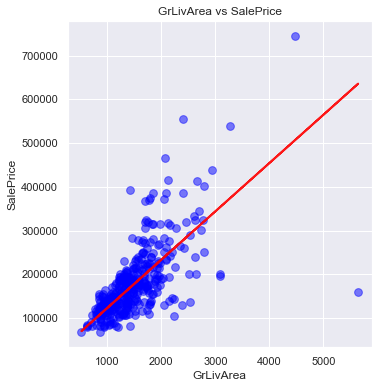

In [148]:
#plt.title('GarageCars vs GrLivArea vs SalePrice')
area = 60
    
fig = plt.figure(figsize=(12,6))
fig.suptitle('2D and 3D view of sales price data')

# First subplot
ax = fig.add_subplot(1,2,1)
ax.scatter(X_test, y_test, alpha=0.5, color='blue', s= area)
ax.plot(X_test, y_pred, alpha=0.9, color='red', linewidth=2)
ax.set_xlabel('GrLivArea')
ax.set_ylabel('SalePrice')
plt.title('GrLivArea vs SalePrice')

plt.show()

<h2 href="#classification_model">Preparing a classification model</h2>

<h2 href="#assembling">Assembling all of these steps using pipelines</h2>

<h2 href="#training_model">Training the model</h2>

<h2 href="#predictions">Running predictions on the model</h2>

<h2 id="evaluating">Evaluating and visualizing model performance</h2>

<h2 id="references">References</h2>
<p>Lutz, Mark. Learning Python: Powerful Object-Oriented Programming. " O'Reilly Media, Inc.", 2013.</p>
<p>Ana Bell, Eric Grimson and John Guttag.  Introduction to Computer Science and Programming in Python, MIT Open Course Ware, MIT 2017</p>